## requirements: pandas, numpy

In [1]:
import napari 

In [2]:
v = napari.Viewer()

Assistant skips harvesting pyclesperanto as it's not installed.


yt : [INFO     ] 2023-10-05 10:16:25,368 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2023-10-05 10:16:25,369 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2023-10-05 10:16:25,370 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-05 10:16:25,370 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-05 10:16:25,371 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|█████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 15789.33it/s]
yt : [INFO     ] 2023-10-05 10:16:25,392 Gathering a field list (this may take a moment.)
yt_napari : [INFO ] 2023-10-05 10:16:48,439:  loading /home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030 from cache.
yt_napari : [INFO ] 2023-10-05 10:16:52,783:  loading /home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030 from cache.
yt_napari

In [64]:
log_dens = v.layers['enzo:Density'].data
log_dens.shape

(200, 200, 200)

In [65]:
log_dens.min(), log_dens.max()

(-2.199839539080851, 3.5467156182990953)

In [66]:
import numpy as np 


In [67]:
label_bin_edges = np.linspace(-3, 5, 31)
n_labels = len(label_bin_edges)-1

In [70]:
new_layer = np.zeros(log_dens.shape, dtype='int')

for ibin in range(n_labels):
    left_edge = label_bin_edges[ibin]
    right_edge = label_bin_edges[ibin+1]
    new_layer[(log_dens<=right_edge) & (log_dens>left_edge)] = ibin

In [79]:
v.add_labels(new_layer, name='density_labels')

<Labels layer 'density_labels' at 0x7f9e0552ff70>

In [16]:
v.layers['density_labels'].properties={}

In [25]:
log_temps = v.layers['enzo:Temperature'].data
log_temps.shape

(400, 400, 400)

In [30]:
layers_to_sample = ['enzo:Temperature', 'enzo:Metal_Density', 'enzo:Density', 'enzo:Dark_Matter_Density', 'gas:velocity_magnitude']

In [77]:
from collections import defaultdict



props = defaultdict(lambda: [])

for label in np.unique(new_layer):    
    props['label'].append(label)
    layer_mask = new_layer==label
    for field in layers_to_sample:
        field_data = v.layers[field].data    
        props[f"mean_{field}"].append(field_data[layer_mask].mean())
    
    

In [ ]:
v.layers['density_labels'].properties = props

## use napari to segment 

Multi-Otsu Thresholding: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_multiotsu.html

if increasing from 3, decrease number of bins (does not scale well).

8 levels, 50 bins takes 20 seconds

StackViewNDArray([[[5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   ...,
                   [4, 4, 4, ..., 4, 4, 4],
                   [4, 4, 4, ..., 4, 4, 4],
                   [4, 4, 4, ..., 4, 4, 4]],

                  [[5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   ...,
                   [4, 4, 4, ..., 4, 4, 4],
                   [4, 4, 4, ..., 4, 4, 4],
                   [4, 4, 4, ..., 4, 4, 4]],

                  [[5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   ...,
                   [4, 4, 4, ..., 4, 4, 4],
                   [4, 4, 4, ..., 4, 4, 4],
                   [4, 4, 4, ..., 4, 4, 4]],

                  ...,

                  [[5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   ...,
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4]],

                  [[5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   ...,
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4]],

                  [[5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   ...,
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4],
                   [5, 5, 5, ..., 4, 4, 4]]], dtype=uint8)
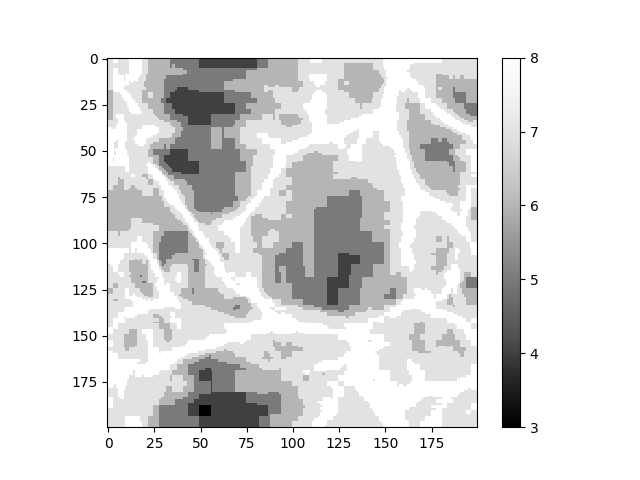
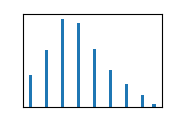

In [3]:
v.layers['density_otsu'].data

### morphological watershed

run it, start with .1, go down to .05, .01  to show how you get more domains

StackViewNDArray([[[10, 10, 10, ...,  1,  1,  1],
                   [10, 10, 10, ...,  1,  1,  1],
                   [10, 10, 10, ...,  1,  1,  1],
                   ...,
                   [13, 13, 13, ..., 16, 16, 16],
                   [13, 13, 13, ..., 16, 16, 16],
                   [13, 13, 13, ..., 16, 16, 16]],

                  [[10, 10, 10, ...,  1,  1,  1],
                   [10, 10, 10, ...,  1,  1,  1],
                   [10, 10, 10, ...,  1,  1,  1],
                   ...,
                   [13, 13, 13, ..., 16, 16, 16],
                   [13, 13, 13, ..., 16, 16, 16],
                   [13, 13, 13, ..., 16, 16, 16]],

                  [[10, 10, 10, ...,  1,  1,  1],
                   [10, 10, 10, ...,  1,  1,  1],
                   [10, 10, 10, ...,  1,  1,  1],
                   ...,
                   [13, 13, 13, ..., 16, 16, 16],
                   [13, 13, 13, ..., 16, 16, 16],
                   [13, 13, 13, ..., 16, 16, 16]],

                  ...,

                  [[61, 61, 61, ..., 44, 44, 44],
                   [61, 61, 61, ..., 44, 44, 44],
                   [61, 61, 61, ..., 44, 44, 44],
                   ...,
                   [59, 59, 59, ..., 53, 53, 53],
                   [59, 59, 59, ..., 53, 53, 53],
                   [59, 59, 59, ..., 53, 53, 53]],

                  [[61, 61, 61, ..., 44, 44, 44],
                   [61, 61, 61, ..., 44, 44, 44],
                   [61, 61, 61, ..., 44, 44, 44],
                   ...,
                   [59, 59, 59, ..., 53, 53, 53],
                   [59, 59, 59, ..., 53, 53, 53],
                   [59, 59, 59, ..., 53, 53, 53]],

                  [[61, 61, 61, ..., 44, 44, 44],
                   [61, 61, 61, ..., 44, 44, 44],
                   [61, 61, 61, ..., 44, 44, 44],
                   ...,
                   [59, 59, 59, ..., 53, 53, 53],
                   [59, 59, 59, ..., 53, 53, 53],
                   [59, 59, 59, ..., 53, 53, 53]]])
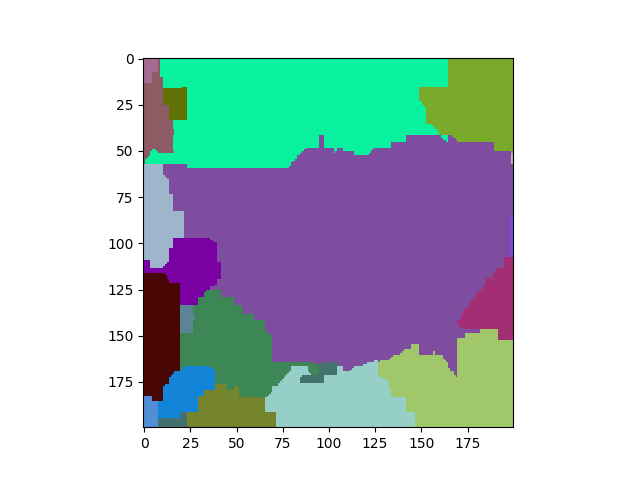

In [31]:
v.layers['dens_watershed'].data

In [27]:
import numpy as np 

In [9]:
def extract_label_props(label_array, im_layer_list, current_label, rescale=False):
    label_mask = label_array == current_label
    label_properties = {'label': current_label}
    for im_layer in im_layer_list:
        label_data = im_layer.data[label_mask]
        label_data = label_data[np.isfinite(label_data)] # dark matter density not defined everywhere
        if rescale:
            im_data = im_layer.data[np.isfinite(im_layer.data)]
            mx = np.nanmax(im_data)
            mn = np.nanmin(im_data)
            label_data = (label_data - mn) / (mx-mn)
            # else:
            #     label_data = label_data / label_data.max()
        label_properties[f"{im_layer.name}_mean"] = label_data.mean()
    return label_properties 
    

In [24]:
label_array = v.layers['density_watershed'].data
# label_array = v.layers['density_otsu'].data
im_layer_list = [v.layers[field] for field in layers_to_sample]
extract_label_props(label_array, im_layer_list, 2, rescale=True)

KeyError: "'density_watershed' is not in list"

In [ ]:
label_props = []
for label in np.unique(label_array):
    label_props.append(extract_label_props(label_array, im_layer_list, label, rescale=True))
    

In [25]:
import pandas as pd 
df = pd.DataFrame(label_props)
df

""


In [ ]:
# v.layers['density_otsu'].properties = df.to_dict('list')
v.layers['density_watershed'].properties = df.to_dict('list')

kmeans workflow 

1. h_minima filter with value of 4
2. regional_maxima to create binary of that
3. convert to label
4. connected_component_label to label each high density region separately

StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)
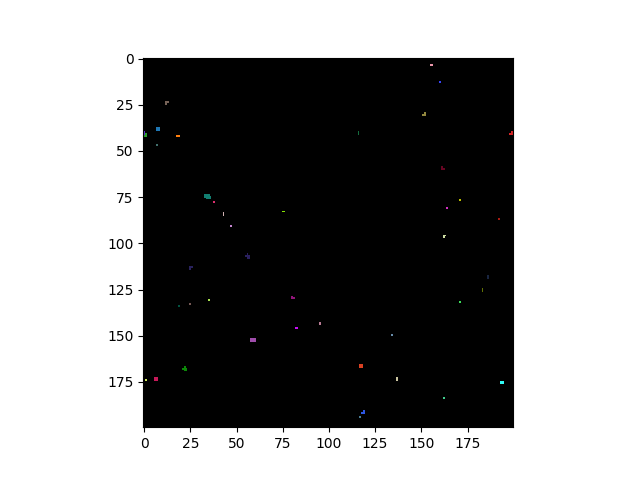

In [53]:
d = v.layers['high_density_label'].data
d

In [49]:
df

,label,enzo:Temperature_mean,enzo:Metal_Density_mean,enzo:Density_mean,enzo:Dark_Matter_Density_mean,gas:velocity_magnitude_mean
0,0,0.336625,0.073057,0.177672,0.580788,0.3011952467299217 dimensionless
1,1,0.916624,0.892417,0.806153,0.917535,0.30850117092632623 dimensionless
2,2,0.880248,0.302227,0.750079,0.904061,0.41768538926945487 dimensionless
3,3,0.924024,0.849520,0.805990,0.901925,0.3288320163868275 dimensionless
4,4,0.912627,0.708315,0.779558,0.902654,0.4754701041761029 dimensionless
5,5,0.931552,0.712430,0.743674,0.860278,0.3631422439961149 dimensionless
6,6,0.776505,0.823371,0.806954,0.916220,0.3437510872139839 dimensionless
7,7,0.887337,0.297721,0.737827,0.926636,0.5197909487796958 dimensionless
8,8,0.643131,0.694917,0.737505,0.894577,0.45865002185699605 dimensionless
9,9,0.927642,0.647593,0.795465,0.899486,0.13614967260912803 dimensionless


Selected labels layer: high_density_label copy
Selected measurements: ['enzo:Temperature_mean', 'enzo:Metal_Density_mean', 'enzo:Density_mean', 'enzo:Dark_Matter_Density_mean', 'gas:velocity_magnitude_mean']
Selected clustering method: KMeans
KMEANS predictions finished.
Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


Traceback (most recent call last):
  File "/home/chavlin/.pyenv/versions/3.10.11/envs/ytnaparitutorialplanning/lib/python3.10/site-packages/matplotlib/cbook.py", line 298, in process
    func(*args, **kwargs)
  File "/home/chavlin/.pyenv/versions/3.10.11/envs/ytnaparitutorialplanning/lib/python3.10/site-packages/matplotlib/widgets.py", line 2358, in release
    self._release(event)
  File "/home/chavlin/.pyenv/versions/3.10.11/envs/ytnaparitutorialplanning/lib/python3.10/site-packages/matplotlib/widgets.py", line 3795, in _release
    self.onselect(self.verts)
  File "/home/chavlin/.pyenv/versions/3.10.11/envs/ytnaparitutorialplanning/lib/python3.10/site-packages/napari_clusters_plotter/_Qt_code.py", line 511, in onselect
    self.parent.manual_clustering_method(self.ind_mask)
  File "/home/chavlin/.pyenv/versions/3.10.11/envs/ytnaparitutorialplanning/lib/python3.10/site-packages/napari_clusters_plotter/_plotter.py", line 115, in manual_clustering_method
    self.run(
  File "/home/cha

Selected labels layer: high_density_label copy
Selected measurements: ['enzo:Temperature_mean', 'enzo:Metal_Density_mean', 'enzo:Density_mean', 'enzo:Dark_Matter_Density_mean', 'gas:velocity_magnitude_mean']
Selected clustering method: KMeans
KMEANS predictions finished.
Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


Traceback (most recent call last):
  File "src/psygnal/_signal.py", line 990, in _run_emit_loop
  File "src/psygnal/_weak_callback.py", line 290, in cb
  File "/home/chavlin/.pyenv/versions/3.10.11/envs/ytnaparitutorialplanning/lib/python3.10/site-packages/magicgui/widgets/_function_gui.py", line 218, in _disable_button_and_call
    self.__call__()
  File "/home/chavlin/.pyenv/versions/3.10.11/envs/ytnaparitutorialplanning/lib/python3.10/site-packages/magicgui/widgets/_function_gui.py", line 331, in __call__
    value = self._function(*bound.args, **bound.kwargs)
  File "/home/chavlin/.pyenv/versions/3.10.11/envs/ytnaparitutorialplanning/lib/python3.10/site-packages/napari_tools_menu/__init__.py", line 103, in worker_func
    data = func(*iargs, **ikwargs)
  File "/home/chavlin/.pyenv/versions/3.10.11/envs/ytnaparitutorialplanning/lib/python3.10/site-packages/napari_time_slicer/__init__.py", line 61, in worker_function
    result = function(*bound.args, **bound.kwargs)
  File "/home/ch

In [46]:
label_array = v.layers['high_density_label'].data
im_layer_list = [v.layers[field] for field in layers_to_sample]
label_props = []
for label in np.unique(label_array):
    label_props.append(extract_label_props(label_array, im_layer_list, label, rescale=True))

df = pd.DataFrame(label_props)
v.layers['high_density_label'].properties = df.to_dict('list')

StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)
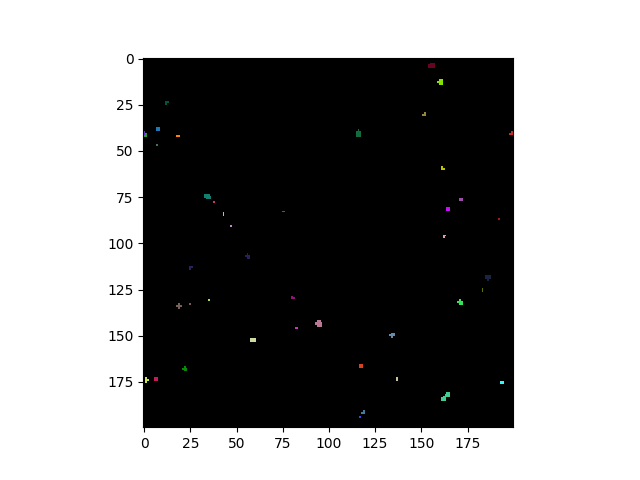

In [29]:
v.layers['high_density_label'].data

## domain-wide kmeans

Say we don't want to pre-select high density regions and just want to classify a whole image via kmeans... 

### using the napari-clusters-plotter 

We can manually build a labels layer. Let's take the extreme where every pixel is its own label... will napari die?

In [3]:
import numpy as np 

In [4]:
v.layers['enzo:Density'].data.size

360000

not worried about contiguity here...

In [5]:
labels_1d = np.arange(0, v.layers['enzo:Density'].data.size, dtype=int)
labels = labels_1d.reshape(v.layers['enzo:Density'].data.shape)

In [6]:
v.add_labels(labels, name='pixel_labels')

<Labels layer 'pixel_labels' at 0x7fd950ad1210>

In [7]:
def rescale_0_1(imdata):
    finite_data = imdata[np.isfinite(imdata)]
    mx = finite_data.max()
    mn = finite_data.min()
    return (imdata - mn)/(mx - mn)

In [10]:
dens = rescale_0_1(v.layers['enzo:Density'].data).reshape(v.layers['pixel_labels'].data.size)
temper = rescale_0_1(v.layers['enzo:Temperature'].data).reshape(v.layers['pixel_labels'].data.size)
velo = rescale_0_1(v.layers['gas:velocity_magnitude'].data).reshape(v.layers['pixel_labels'].data.size)

In [ ]:
v.layers['pixel_labels'].properties = {
    'label': labels_1d, 
    'density': dens, 
    'temperature': temper,
    'velocity': velo}

In [1]:
import yt 

ds = yt.load_sample('enzo_tiny_cosmology')

yt : [INFO     ] 2023-10-04 22:49:12,454 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/enzo_tiny_cosmology/DD0046/DD0046'
yt : [INFO     ] 2023-10-04 22:49:12,575 Parameters: current_time              = 230.66527489234
yt : [INFO     ] 2023-10-04 22:49:12,576 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2023-10-04 22:49:12,576 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-04 22:49:12,577 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-04 22:49:12,578 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-04 22:49:12,578 Parameters: current_redshift          = -2.7810863612032e-09
yt : [INFO     ] 2023-10-04 22:49:12,579 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2023-10-04 22:49:12,579 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2023-10-04 22:49:12,579 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-10-04 22:49:12

In [3]:
ds.field_list

Parsing Hierarchy : 100%|██████████████████████████████████████████████████████████████████████████████████| 211/211 [00:00<00:00, 2728.99it/s]
yt : [INFO     ] 2023-10-04 22:49:17,587 Gathering a field list (this may take a moment.)


[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'Temperature'),
 ('enzo', 'TotalEnergy'),
 ('enzo', 'x-velocity'),
 ('enzo', 'y-velocity'),
 ('enzo', 'z-velocity'),
 ('io', 'creation_time'),
 ('io', 'dynamical_time'),
 ('io', 'metallicity_fraction'),
 ('io', 'particle_index'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_type'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('nbody', 'creation_time'),
 ('nbody', 'dynamical_time'),
 ('n

yt : [INFO     ] 2023-10-04 22:52:15,027 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-10-04 22:52:15,027 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-10-04 22:52:15,029 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-10-04 22:52:15,029 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-10-04 22:52:15,035 Making a fixed resolution buffer of (('gas', 'angular_momentum_magnitude')) 800 by 800



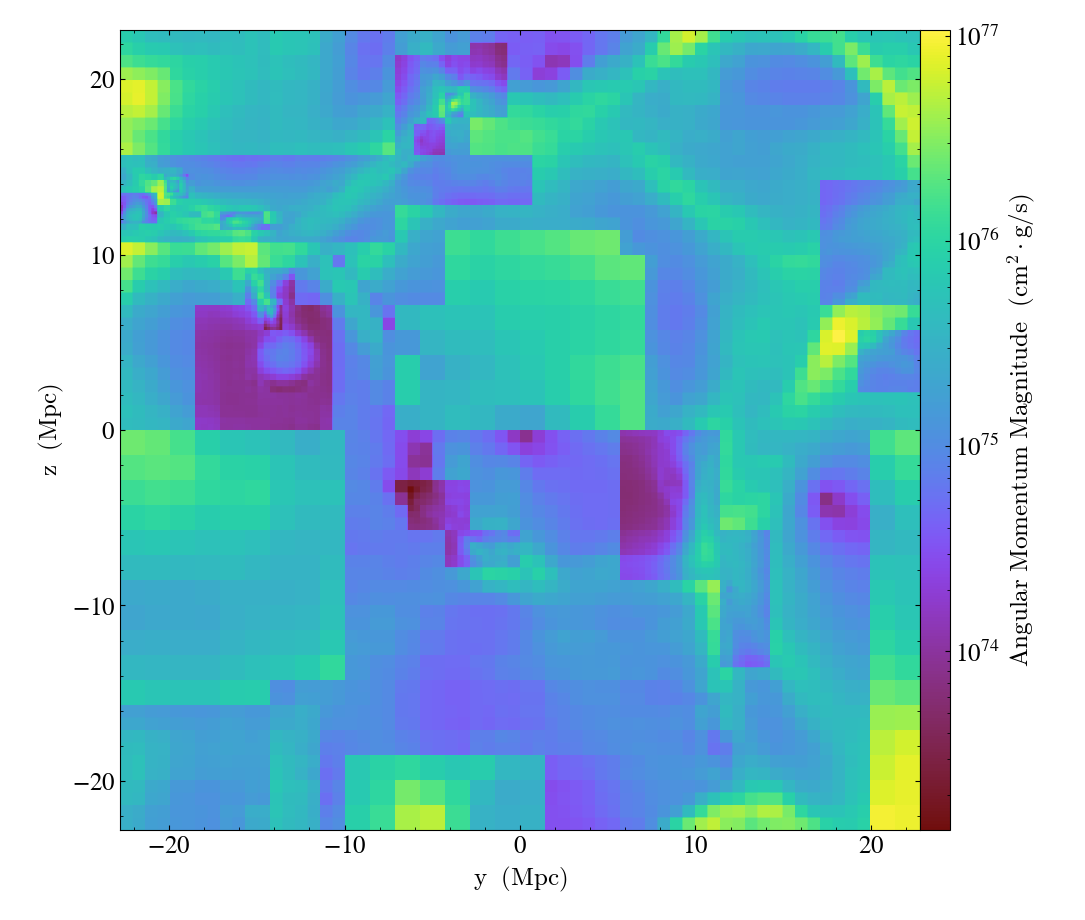

In [7]:
yt.SlicePlot(ds,'x',('gas', 'angular_momentum_magnitude'))

yt : [INFO     ] 2023-10-04 23:03:08,785 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-10-04 23:03:08,786 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-10-04 23:03:08,789 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-10-04 23:03:08,790 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-10-04 23:03:08,791 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 800 by 800



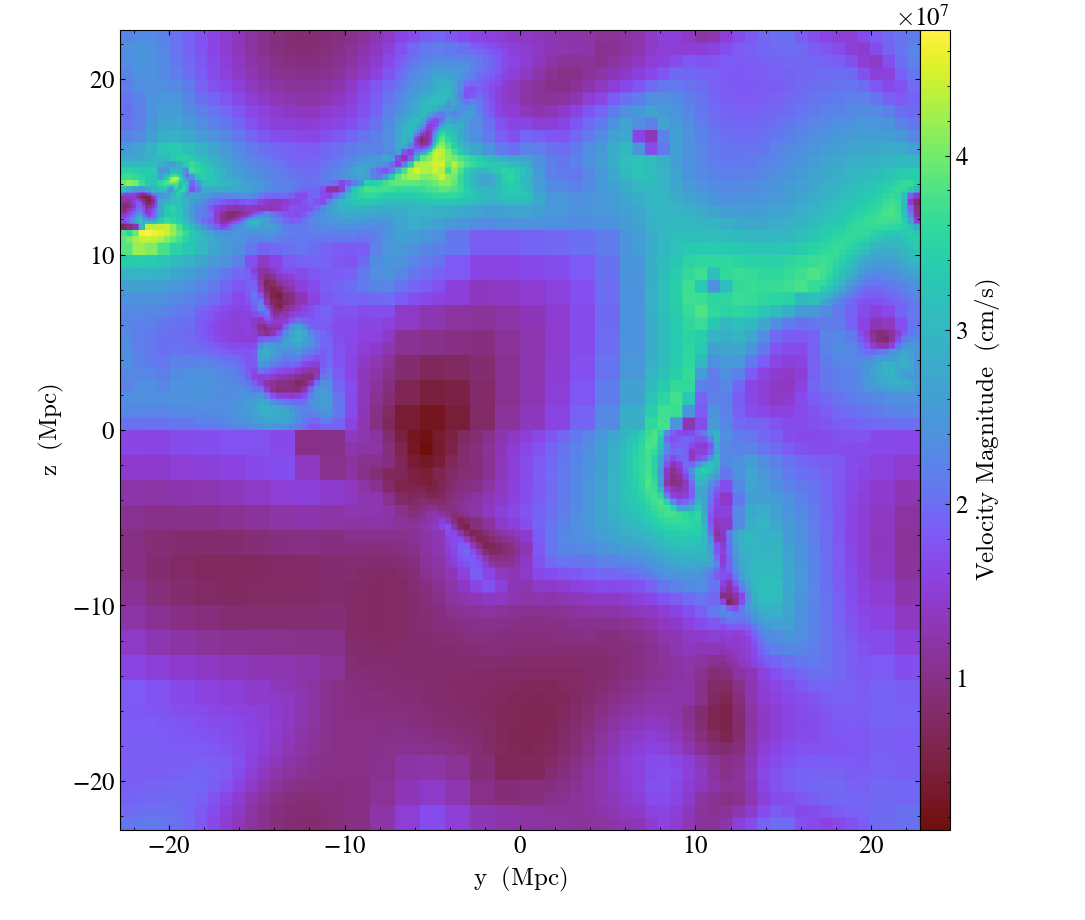

yt_napari : [INFO ] 2023-10-04 23:04:22,555:  loading /home/chavlin/hdd/data/yt_data/yt_sample_sets/enzo_tiny_cosmology/DD0046/DD0046 from cache.
yt_napari : [INFO ] 2023-10-04 23:04:32,382:  loading /home/chavlin/hdd/data/yt_data/yt_sample_sets/enzo_tiny_cosmology/DD0046/DD0046 from cache.
yt_napari : [INFO ] 2023-10-04 23:04:38,123:  loading /home/chavlin/hdd/data/yt_data/yt_sample_sets/enzo_tiny_cosmology/DD0046/DD0046 from cache.
yt_napari : [INFO ] 2023-10-04 23:04:48,402:  loading /home/chavlin/hdd/data/yt_data/yt_sample_sets/enzo_tiny_cosmology/DD0046/DD0046 from cache.
yt_napari : [INFO ] 2023-10-04 23:05:09,477:  loading /home/chavlin/hdd/data/yt_data/yt_sample_sets/enzo_tiny_cosmology/DD0046/DD0046 from cache.
/home/chavlin/.pyenv/versions/3.10.11/envs/ytnaparitutorialplanning/lib/python3.10/site-packages/unyt/array.py:1802: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)
yt_napari : [INFO ] 2023-10-04 23:05:15,834

In [17]:
slc = yt.SlicePlot(ds,'x',('gas', 'velocity_magnitude'))
slc.set_log(('gas', 'velocity_magnitude'), False)
slc.show()

In [4]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_radial_velocity'),
 (